# <center>THỰC HIỆN ĐỒ ÁN</center>
# Import các thư viện

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## Xử lý ảnh với PIL

In [38]:
  #tham khảo https://www.geeksforgeeks.org/python-pil-image-open-method/ 
def readImg(img_path):
    raw_img = Image.open(img_path)
    return raw_img

def reshape_img(raw_img):
    img = np.array(raw_img)
    img_height, img_width, num_channels = img.shape
    img = np.array(img.reshape(img_height*img_width, num_channels))
    return img, img_height, img_width, num_channels

# Thuật toán K-Means

Khai báo hàm gợi ý cho thuật toán K-Means: 
```python
    def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
        '''
        K-Means algorithm
        
        Inputs:
            img_1d : np.ndarray with shape=(height * width, num_channels)
                Original image in 1d array
            
            k_clusters : int
                Number of clusters
                
            max_iter : int
                Max iterator
                
            init_cluster : str
                The way which use to init centroids
                'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
                'in_pixels' --> centroid is a random pixels of original image
                
        Outputs:
            centroids : np.ndarray with shape=(k_clusters, num_channels)
                Store color centroids
                
            labels : np.ndarray with shape=(height * width, )
                Store label for pixels (cluster's index on which the pixel belongs)
        
        '''
        
        ### YOUR CODE HERE
```

In [39]:
def cmp(minus_centroid):
  for item in minus_centroid:
    if item < -1.0 or item > 1.0:
      return False
  return True

In [40]:
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
  # Khởi tạo k_clusters centroid cho img_1d bằng phương pháp init_centroids
  # chọn k_clusters centroids trong img_1d bằng 2 cách
  if init_centroids == 'random':
    # centroid has `c` channels, with `c` is initial random in [0,255]
    # Chọn màu ngẫu nhiên bằng random 3 số trong mã màu RGB
    centroids = np.random.randint(0, 256, size = (k_clusters, img_1d.shape[1]))
    while len(np.unique(centroids, axis = 0)) < k_clusters:
      centroids = np.random.randint(0, 256, size = (k_clusters, img_1d.shape[1]))
    
  else: # init_centroids = 'in_pixels':
    # centroid is a random pixels of original image
    # Chọn centroid ngẫu nhiên từ chính các pixels trong ảnh
    centroids = img_1d[np.random.choice(img_1d.shape[0], size = k_clusters, replace = False)]
  
  for _ in range(max_iter):   
    # Tính khoảng cách rồi gắn nhãn mới cho các điểm ảnh
    # Distance: lưu khoảng cách từ mỗi điểm ảnh trong img_1d tới từng centroid trong list `centroids`
    distance = []
    for i in range(k_clusters):
    # Tính khoảng cách rồi thêm vào list distance
      distance.append(np.linalg.norm(img_1d - centroids[i], axis = 1, keepdims = False))
    
    # gán nhãn cho từng điểm ảnh
    labels = np.argmin(distance, axis=0)
    new_centroids = []
    # Tính giá trị mới của centroids bằng trung bình cộng của tất cả các điểm ảnh có cùng cluster
    for i in range(k_clusters):
      if (i in labels):
       # gom nhóm các nhãn có cùng giá trị
        new_centroids.append(img_1d[labels == i].mean(axis = 0))
      else:
        new_centroids.append(centroids[i])
    
    # Thiết lập điều kiện dừng
    stop = True
    for i in range(k_clusters):
      if not cmp(centroids[i] - new_centroids[i]):
        centroids[i] = new_centroids[i]
        stop = False
    if stop:
      break  
        
  return centroids, labels

## Các hàm hỗ trợ vận hành

In [41]:
def showResult(raw_img, k_clusters, max_iter, init_centroids):
    output_img = []
    output_img.append(raw_img)
    
    test_img, img_height, img_width, num_channels = reshape_img(raw_img)
    centroids, labels = kmeans(test_img, k_clusters, max_iter, init_centroids)
    
    for i in range(len(test_img)):
        test_img[i] = centroids[labels[i]]
        
    test_img = test_img.astype("uint8")
    test_img = test_img.reshape(img_height, img_width, num_channels)
    output_img.append(test_img.copy())
    
    demo, axis = plt.subplots(1, 2, figsize = (12, 8))
    
    axis[0].set_title(f'Ảnh gốc')
    axis[0].imshow(output_img[0])
    
    axis[1].set_title("Init " + init_centroids + " | k_clusters = " + str(k_clusters))
    axis[1].imshow(output_img[1])
    
    Image.fromarray(output_img[1], 'RGB').save("Init" + init_centroids + "_" + str(k_clusters) + ".jpg")
    
    plt.tight_layout()

## Hàm Main()

Nhập vào tên tập tin ảnh. 
- `Tập tin ảnh phải nằm trong cùng một thư mục với tập tin 21127453.ipynb`
- `Khi nhập phải nhập kèm với phần extension của tập tin.`

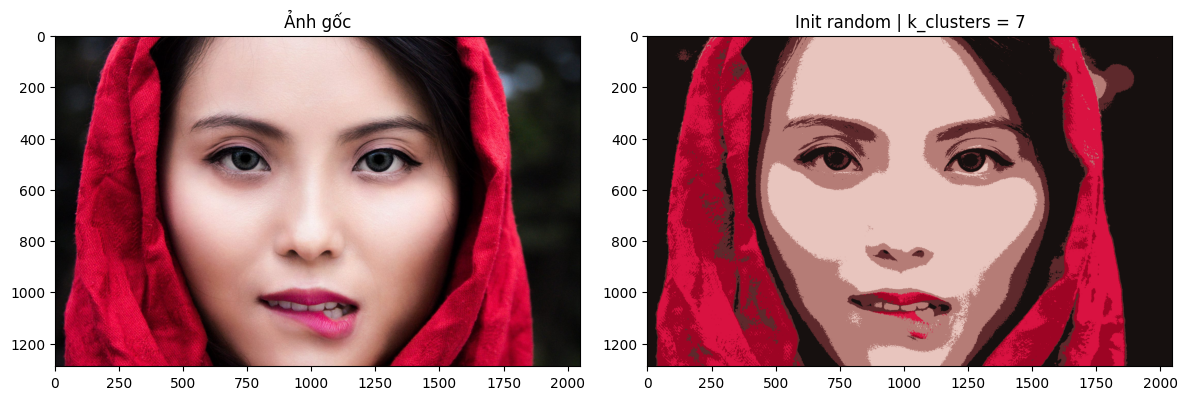

In [49]:
def main():
  # Nhập vào tên file ảnh.
  img_path = input("Enter the name of the image file: ")
  #img_path = 'pic1.jpg'
  raw_img = readImg(img_path)
  showResult(raw_img, 7, 10, 'random')

main()